<a href="https://colab.research.google.com/github/NeelvaniVarsha/MLLab/blob/main/Lab10_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)
names = [f"Person_{i}" for i in range(50)]
ages = np.random.randint(20, 60, 50)
income = np.random.randint(30000, 120000, 50)

In [7]:
df = pd.DataFrame({'Name': names, 'Age': ages, 'Income': income})
df.to_csv("income.csv", index=False)

In [8]:
data = pd.read_csv("income.csv")

In [9]:
X = data[['Age', 'Income']]

In [10]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

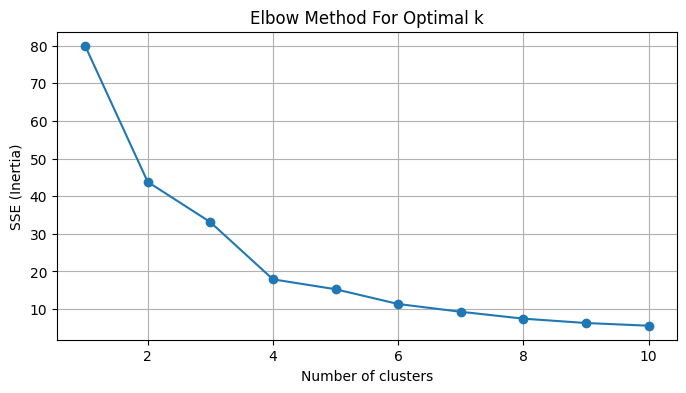

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [14]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=42)

In [15]:
predictions = kmeans.predict(X_test_scaled)

In [16]:
full_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
true_clusters = full_kmeans.fit_predict(scaler.fit_transform(X))

In [17]:
def map_clusters(true_labels, pred_labels):
    labels = np.zeros_like(pred_labels)
    for i in range(optimal_k):
        mask = (pred_labels == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(true_labels[mask])[0]
    return labels

In [19]:
mapped_preds = map_clusters(true_clusters[X_test.index], predictions)
accuracy = accuracy_score(true_clusters[X_test.index], mapped_preds)
print(f"Clustering Accuracy: {accuracy:.2f}")

Clustering Accuracy: 0.70
